## Visualizing Topic Models

In [1]:
import gensim

# Analyzing both Body and Title of reddit complaints

# Load all data from models

# Model - 3 topics 
dict3 = gensim.corpora.Dictionary.load('models/body_title/dictionary_body_title_3.gensim')
corpus3 = gensim.corpora.MmCorpus('models/body_title/corpus_body_title_3.mm')
lda3 = gensim.models.ldamodel.LdaModel.load('models/body_title/model_body_title_3.gensim')

# Model - 7 topics
dict7 = gensim.corpora.Dictionary.load('models/body_title/dictionary_body_title_7.gensim')
corpus7 = gensim.corpora.MmCorpus('models/body_title/corpus_body_title_7.mm')
lda7 = gensim.models.ldamodel.LdaModel.load('models/body_title/model_body_title_7.gensim')

# Model - 5 topics
dict5 = gensim.corpora.Dictionary.load('models/body_title/dictionary_body_title_5.gensim')
corpus5 = gensim.corpora.MmCorpus('models/body_title/corpus_body_title_5.mm')
lda5 = gensim.models.ldamodel.LdaModel.load('models/body_title/model_body_title_5.gensim')


In [2]:
# read in and save tokens from each line
tokens = []
with open('data/tokenized_body_title_edited.csv') as f:
    for line in f:
        split_line = line.split(",")

        token_list = []
        for token in split_line:
            if len(token) > 0 and token != "\n":
                token_list.append(token)

        tokens.append(token_list)

In [3]:
print(dict3)
#8697 unique words in corpus

Dictionary(8697 unique tokens: [',', 'act', 'around', 'attention', 'care']...)


## Question: What words show up the most in the posts?
**Structure of corpus:**
- the corpus is a list of tuples
- the first value in tuple is integer, which maps a word in the dictionary
- the second value is the count of the value 

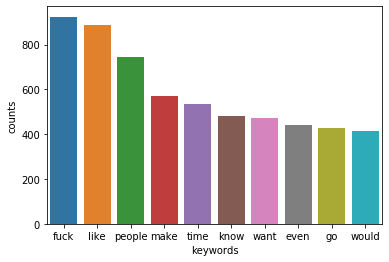

In [4]:
# find total counts of keywords, store in keyword_count_dict
# dictionary: {int mapping to word: count it occurs in all documents}
keys = dict3.keys()
keyword_count_dict = {key:0 for key in keys}

# iterate through every value and add to dictionary
for counter, values in enumerate(corpus3):
    for tup in values:
        keyword_count_dict[tup[0]] = tup[1] + keyword_count_dict[tup[0]]

# sort the dictionary by the count
sorted_keywords = sorted(keyword_count_dict.items(), key=lambda x: x[1], reverse=True)
# get the top ten keywords
top_keywords = sorted_keywords[:10]

# visualize

import seaborn as sns
import pandas as pd

keywords = [dict3[key_tuple[0]] for key_tuple in top_keywords]
counts = [key_tuple[1] for key_tuple in top_keywords]
top_key_dict = {"keywords":keywords, "counts":counts}
df = pd.DataFrame(top_key_dict)

ax = sns.barplot(x="keywords", y="counts", data=df)

Looks like people said "fuck" on average once per post. They also usually mentioned people. 

**Dominant keywords in each topic**

In [5]:
# modified from:
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#6.-What-is-the-Dominant-topic-and-its-percentage-contribution-in-each-document
def get_dominant_topic(lda, corpus):
    # initialize output DataFrame
    df = pd.DataFrame()
    
    # Get main topic in each document
    for row_number, row in enumerate(lda[corpus]):
        
        # row : a list of a series of tuples holding the topic(int) and its percentage(float) in the document
        row = sorted(row, key=lambda x: x[1], reverse=True) 
        
        # sort the row by percentage topic
                        
        # Get the dominant topic, percent contribution, and keywords for each document
        for j, (topic_num, perc_topic) in enumerate(row): 
            # we only want the dominant topic, so just get the first tuple, which we find when j==0
            if j == 0: # => dominant topic
                topic_perc_tuple = lda.show_topic(topic_num)
                topic_keywords = ",".join([word for word, prop in topic_perc_tuple])
                df = df.append(pd.Series([ int(topic_num), round(perc_topic,4), topic_keywords ]), ignore_index=True)
            else:
                break
    df.columns =  ['Dominant_Topic', 'Percent_Contribution', 'Topic_Keywords']
    
    return df

# For the 3 topic model
dom_df = get_dominant_topic(lda3, corpus3)

dominant_df = dom_df.reset_index();
dominant_df.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords'];

In [6]:
dominant_df

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,0,0.0,0.9861,"like,fuck,people,want,know,work,time,feel,make,go"
1,1,2.0,0.6623,"post,people,make,would,reddit,comment,even,thi..."
2,2,2.0,0.9750,"post,people,make,would,reddit,comment,even,thi..."
3,3,0.0,0.3333,"like,fuck,people,want,know,work,time,feel,make,go"
4,4,0.0,0.9188,"like,fuck,people,want,know,work,time,feel,make,go"
...,...,...,...,...
4423,4423,0.0,0.9609,"like,fuck,people,want,know,work,time,feel,make,go"
4424,4424,2.0,0.9176,"post,people,make,would,reddit,comment,even,thi..."
4425,4425,0.0,0.3333,"like,fuck,people,want,know,work,time,feel,make,go"
4426,4426,2.0,0.6872,"post,people,make,would,reddit,comment,even,thi..."


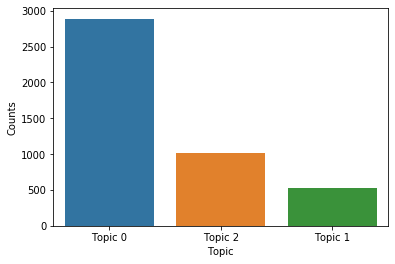

In [7]:
# get counts of the topics
dom_topics = dominant_df.Dominant_Topic.value_counts()
counts = dom_topics.tolist()
topic_num = dom_topics.keys().tolist()
topic_num = ["Topic "+str(int(i)) for i in topic_num]

# convert to df to make seaborn happy
df = pd.DataFrame({"Topic":topic_num, "Counts":counts})

ax = sns.barplot(x="Topic", y="Counts",data=df)

In [8]:
# What are the topics?
topics = lda3.print_topics(num_words=5)

for topic in topics:
    print(topic)

(0, '0.018*"like" + 0.013*"fuck" + 0.010*"people" + 0.009*"want" + 0.009*"know"')
(1, '0.026*"fuck" + 0.008*"time" + 0.007*"give" + 0.007*"like" + 0.006*"month"')
(2, '0.016*"post" + 0.013*"people" + 0.010*"make" + 0.008*"would" + 0.008*"reddit"')


I'm going to assume that fuck is an indicator of "badness" as in the phrase, "fuck people" rather than using it to talk about the act of procreation.    

Topic 0 seems to be about liking but also disliking people and wanting to know something about them - maybe how they act?  
Topic 1 seems to be a little more inscrutable - about being mad about the time of the month, or something having to do with time.  
Topic 2 is about people who post on reddit. 

For the 7 topic model:

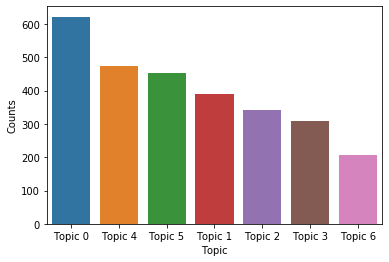

In [9]:
# For the 7 topic model
dom_df = get_dominant_topic(lda7, corpus7)

dominant_df = dom_df.reset_index();
dominant_df.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords'];

# get counts of the topics 
dom_topics = dominant_df.Dominant_Topic.value_counts()
counts = dom_topics.tolist()
topic_num = dom_topics.keys().tolist()
topic_num = ["Topic "+str(int(i)) for i in topic_num]

# convert to df to make seaborn happy
df = pd.DataFrame({"Topic":topic_num, "Counts":counts})

ax = sns.barplot(x="Topic", y="Counts",data=df)

In [10]:
# What are the topics?
topics = lda7.print_topics(num_words=5)

for topic in topics:
    print(topic)

(0, '0.028*"people" + 0.019*"like" + 0.010*"know" + 0.008*"make" + 0.007*"thing"')
(1, '0.019*"like" + 0.014*"feel" + 0.012*"go" + 0.011*"want" + 0.009*"time"')
(2, '0.015*"post" + 0.015*"make" + 0.009*"people" + 0.009*"know" + 0.007*"work"')
(3, '0.017*"time" + 0.012*"would" + 0.010*"work" + 0.009*"fuck" + 0.008*"want"')
(4, '0.054*"fuck" + 0.009*"give" + 0.008*"shit" + 0.008*"even" + 0.007*"month"')
(5, '0.015*"like" + 0.012*"post" + 0.009*"even" + 0.009*"want" + 0.009*"fuck"')
(6, '0.011*"make" + 0.007*"like" + 0.006*"game" + 0.006*"year" + 0.005*"even"')


I'm going to assume that fuck is an indicator of "badness" as in the phrase, "fuck people" rather than using it to talk about the act of procreation.    

Topic 0 is about people, and what they know or like, and something about what they are doing, indicated by "thing". It's a little hard to figure out though.   
Topic 1 is pretty clearly about how things people want and feel - seems like they want things and they want to go places or want things to go their way. So maybe this topic is about things generally not going people's way.  
Topic 2 is complaining about people, about what they know and how they work and even how they post. It seems to be work-related and communication of some sort.  
Topic 3: also about work, with a greater emphasis on time - maybe wasting it?
Topic 4: seems to group together people swearing - I don't even give a fuck/shit seems to be a sentence that might appear in a post like this.   
Topic 5: also about what people post and what they want  
Topic 6: Something about people playing games.  
 
At this point, I'm curious about 5 topics so I'm going to run that model.

For the 5 topic model:

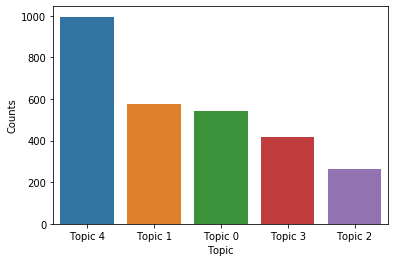

In [11]:
# For the 5 topic model
dom_df = get_dominant_topic(lda5, corpus5)

dominant_df = dom_df.reset_index();
dominant_df.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords'];

# get counts of the topics 
dom_topics = dominant_df.Dominant_Topic.value_counts()
counts = dom_topics.tolist()
topic_num = dom_topics.keys().tolist()
topic_num = ["Topic "+str(int(i)) for i in topic_num]

# convert to df to make seaborn happy
df = pd.DataFrame({"Topic":topic_num, "Counts":counts})

ax = sns.barplot(x="Topic", y="Counts",data=df)

In [12]:
# What are the topics?
topics = lda5.print_topics(num_words=5)

for topic in topics:
    print(topic)

(0, '0.046*"fuck" + 0.023*"people" + 0.012*"like" + 0.011*"make" + 0.007*"know"')
(1, '0.022*"post" + 0.012*"make" + 0.011*"people" + 0.010*"reddit" + 0.010*"comment"')
(2, '0.006*"company" + 0.006*"x200b" + 0.005*"service" + 0.005*"insurance" + 0.005*"give"')
(3, '0.013*"game" + 0.012*"like" + 0.009*"play" + 0.009*"fuck" + 0.009*"go"')
(4, '0.015*"like" + 0.012*"time" + 0.012*"want" + 0.011*"work" + 0.010*"tell"')


Topic 0 is about people, maybe what they know and how they feel.  
Topic 1 is about posts people make on reddit, much like topic 2 in the 3-topic model.  
Topic 2 is about a company and/or a service that gives insurance. Maybe insurance companies? Weirdly specific, I wonder what those posts look like. Unsurprisingly, it's the 5th most dominant topic. (ignore x200b, didn't clean data properly, it's just a unicode space.)  
Topic 3 is about games that are played. Definitely some anger indicated by the f-word. It's interesting that people is NOT in this one, although maybe it's farther down the list.  
Topic 4 is people at work and time - maybe wasting time?

**Summary**  
The 5-topic model seems to be the best. It captures the "time" and "games" element that weren't present in the 3-topic model, and didn't repeat it like the 7-topic model did. The 5-topic model is also the most interpretable of the three models I tried.  
  
It seems like people complain about:  
Topic 0: People, in general  
Topic 1: Posts people make on reddit  
Topic 2: Insurance Companies, apparently (probably a U.S.-only problem)  
Topic 3: Games that are played  (unclear whether it's video or otherwise)  
Topic 4: Work, especially issues pertaining to time 

**Let's look at how the number of associated keywords for for each topic.**

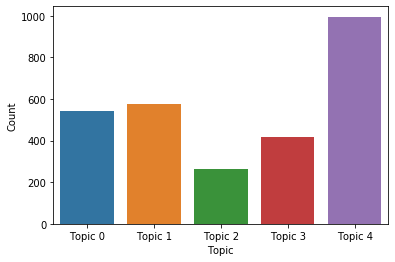

In [13]:
topic0 = dominant_df[dominant_df["Dominant_Topic"] == 0]
topic1 = dominant_df[dominant_df["Dominant_Topic"] == 1]
topic2 = dominant_df[dominant_df["Dominant_Topic"] == 2]
topic3 = dominant_df[dominant_df["Dominant_Topic"] == 3]
topic4 = dominant_df[dominant_df["Dominant_Topic"] == 4]

topics = [topic0, topic1, topic2, topic3, topic4]

topic_count = [len(topic["Keywords"]) for topic in topics]
topic_names = ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4"]
topic_dict = {"Topic": topic_names, "Count":topic_count}

topic_df = pd.DataFrame(topic_dict)
ax = sns.barplot(x="Topic",y="Count", data=topic_df)

Topic 2 makes sense -- it's the most specific, so there's the least keywords associated with it.  
I would expect Topic 1 to have fewer keywords, because it also actually makes sense, but I guess there's a lot of different subreddits people hate the posts of, which would give it more keywords. 

**Weights of Keywords in Each Topic**

In [14]:
lda5.show_topics(formatted=False)

[(0,
  [('fuck', 0.045818258),
   ('people', 0.023322409),
   ('like', 0.012208893),
   ('make', 0.010596851),
   ('know', 0.007434113),
   ('hate', 0.0073723462),
   ('shit', 0.007256144),
   ('want', 0.005753623),
   ('would', 0.0054284967),
   ('give', 0.0047733127)]),
 (1,
  [('post', 0.022215765),
   ('make', 0.011500019),
   ('people', 0.010903897),
   ('reddit', 0.00978107),
   ('comment', 0.009718838),
   ('like', 0.007553638),
   ('even', 0.006734202),
   ('subreddit', 0.0058710766),
   ('would', 0.005764151),
   ('ban', 0.0054781293)]),
 (2,
  [('company', 0.006381347),
   ('x200b', 0.005686324),
   ('service', 0.0054165437),
   ('insurance', 0.005277684),
   ('give', 0.005020467),
   ('like', 0.0047462066),
   ('go', 0.004550098),
   ('also', 0.004031805),
   ('thanks', 0.00392825),
   ('would', 0.0037885802)]),
 (3,
  [('game', 0.013154574),
   ('like', 0.01170891),
   ('play', 0.008935462),
   ('fuck', 0.008651991),
   ('go', 0.008650036),
   ('year', 0.008484529),
   ('ti

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


IndexError: list index out of range

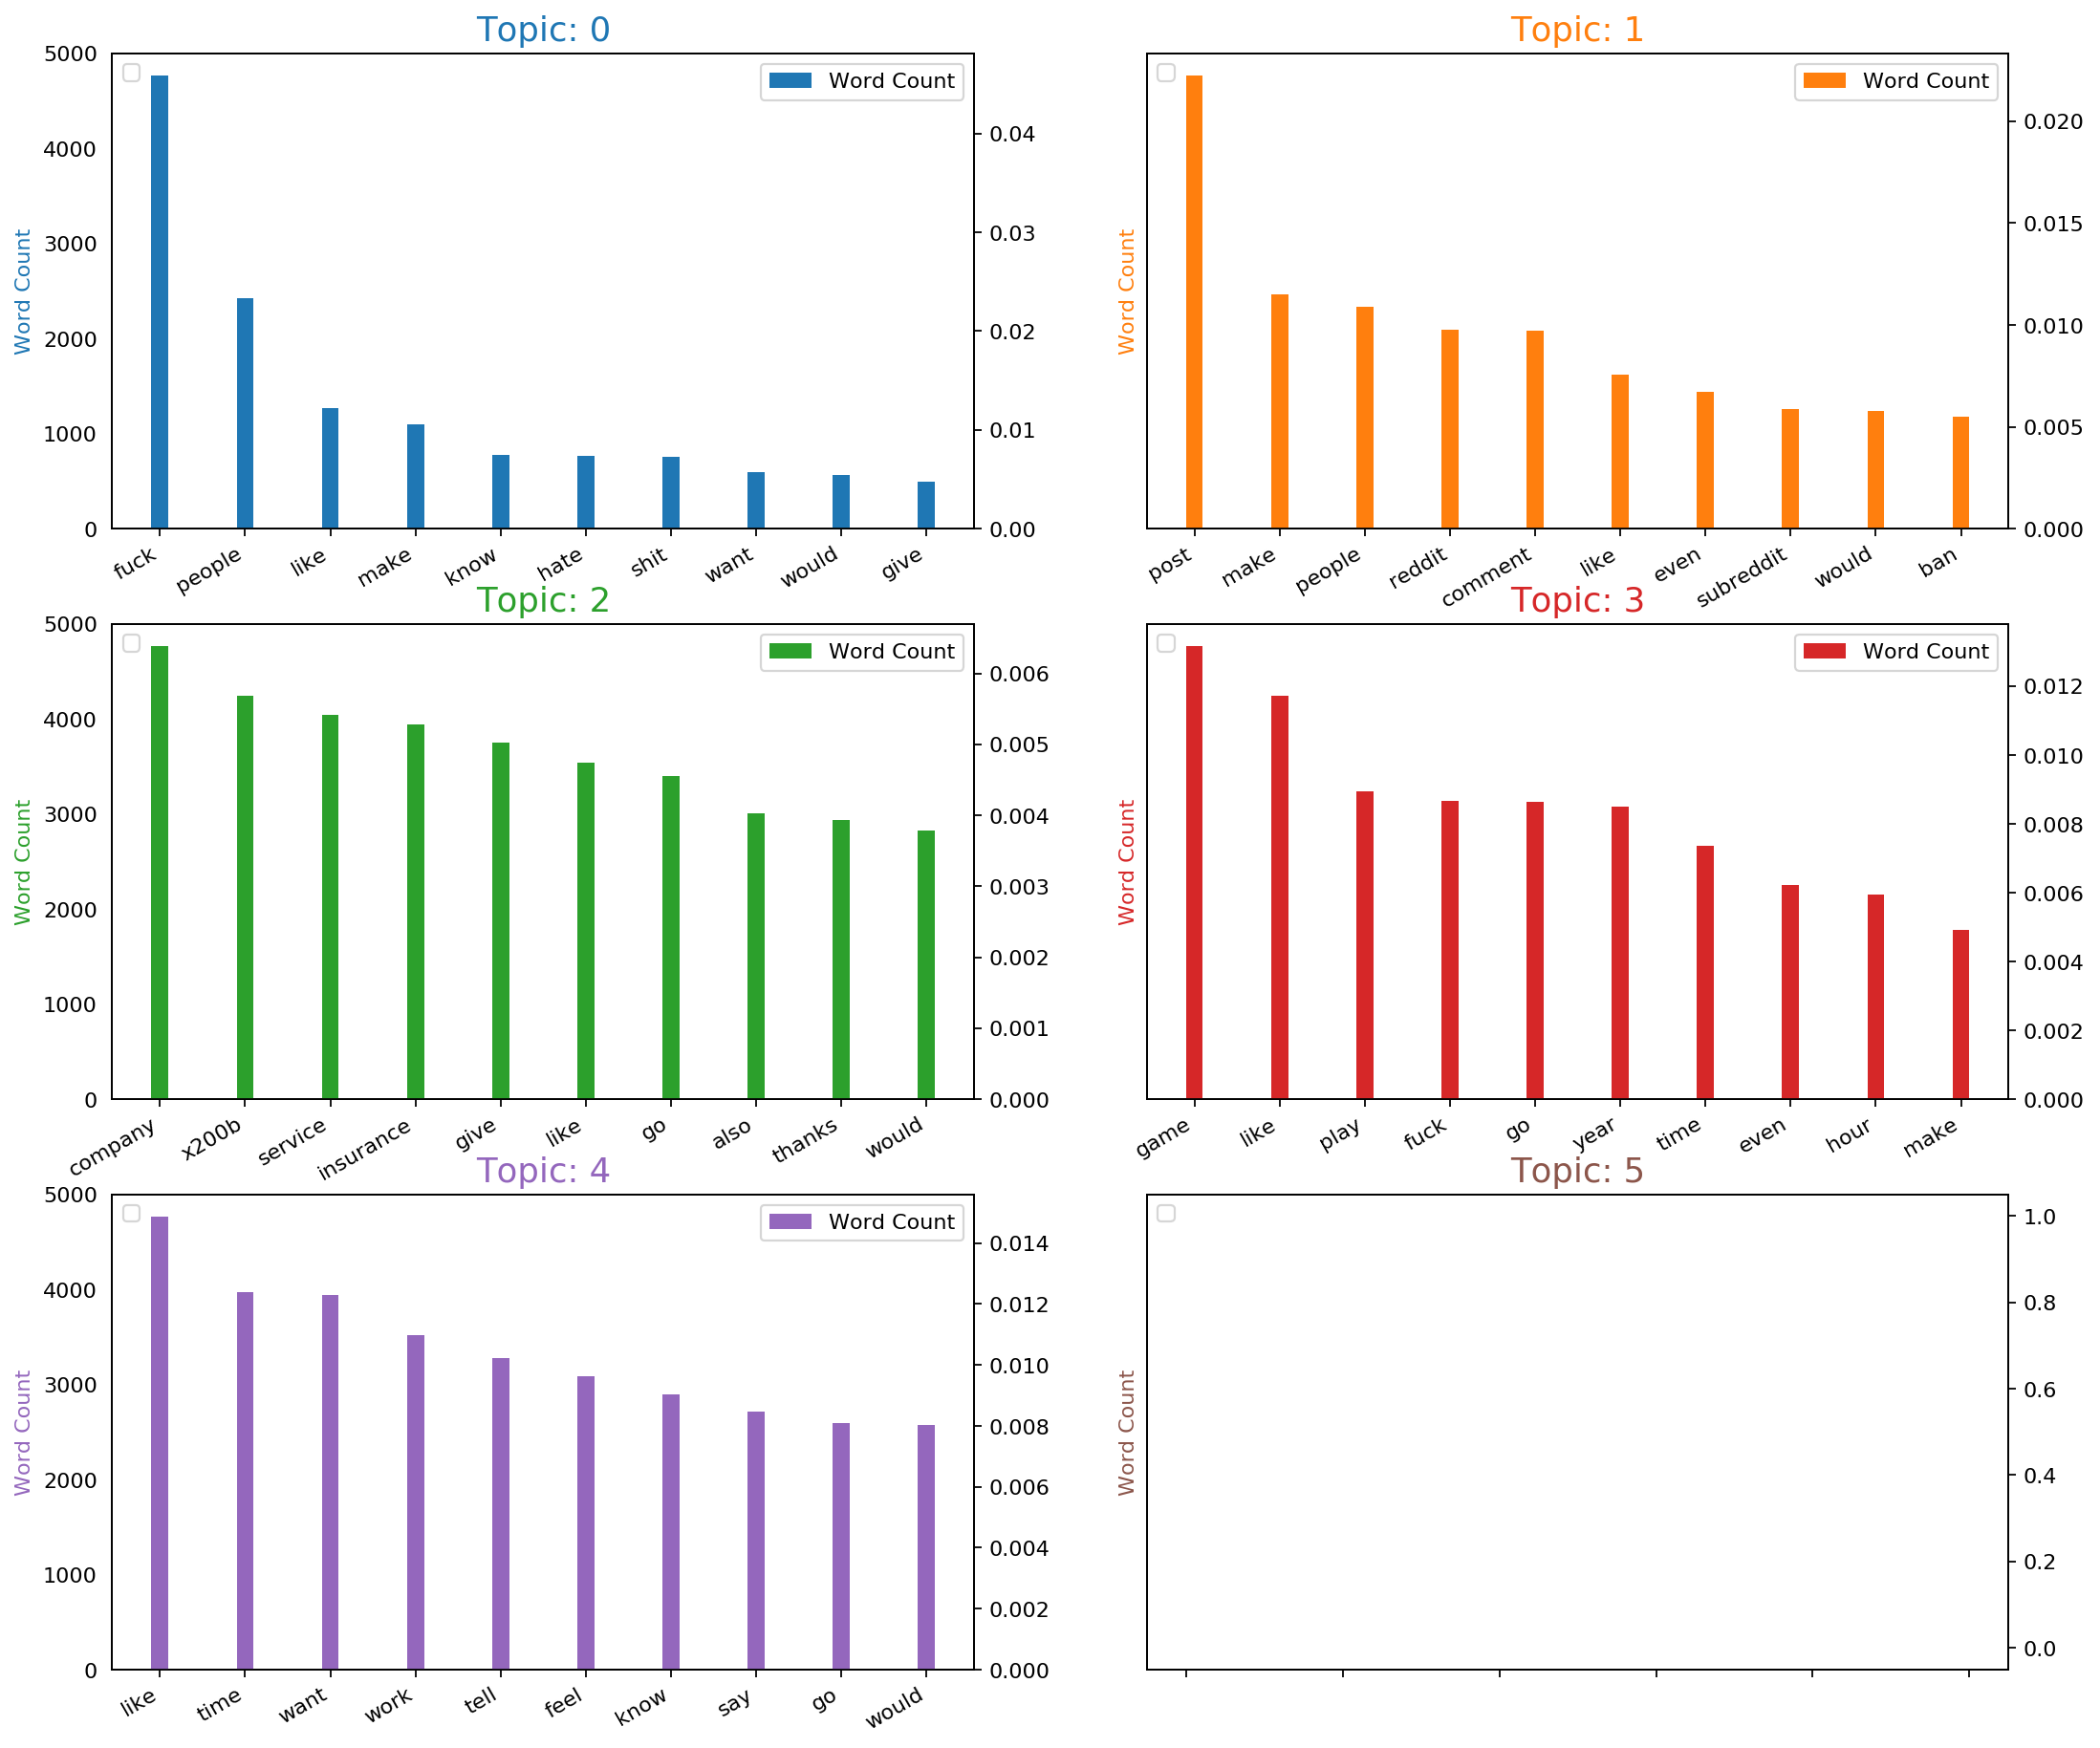

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from collections import Counter
topics = lda5.show_topics(formatted=False)
data_flat = [w for w_list in tokens for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count
fig, axes = plt.subplots(3, 2, figsize=(16,14), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Word Count')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_ylim(0, 5000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

LSI 5-topic Model

In [16]:
# Model - 5 topics
lsi_dict5 = gensim.corpora.Dictionary.load('models/body_title/lsi_dictionary_body_title_5.gensim')
lsi_corpus5 = gensim.corpora.MmCorpus('models/body_title/lsi_corpus_body_title_5.mm')
lsi5 = gensim.models.ldamodel.LdaModel.load('models/body_title/lsi_model_body_title_5.gensim')

In [17]:
# What are the topics?
topics = lsi5.print_topics(num_words=5)

for topic in topics:
    print(topic)

AttributeError: 'NoneType' object has no attribute 's'

For LSI method the topics were:

(0, '0.443*"fuck" + 0.316*"like" + 0.205*"people" + 0.201*"time" + 0.182*"go"')  
(1, '-0.867*"fuck" + 0.141*"like" + 0.100*"go" + 0.097*"could" + 0.088*"work"')  
(2, '0.742*"people" + 0.133*"post" + -0.133*"go" + -0.126*"time" + -0.122*"back"')  
(3, '-0.498*"like" + 0.392*"people" + -0.374*"game" + -0.230*"feel" + 0.181*"battery"')  
(4, '0.438*"battery" + 0.233*"say" + -0.198*"people" + 0.188*"halfords" + 0.166*"mechanic"')  

So...
1. people and time
2. work
3. people who post on reddit, I guess about time 
4. people and games - battery is interesting, wonder where that came from
5. people complaining about their cars, specifically talking about mechanics and batteries and halfords which is a british repair shop

Which is very similar to the LDA 5 model.  
   
Actually, it was the same results as LDA 5 except that the 5th topic for LDA was insurance companies and 5th topic for LSI was car repair.